In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# **Data Cleanup**

In [ ]:
df = pd.read_csv('mushrooms.csv')

In [ ]:
# Check for missing values.
missing_values = df.isin(['?']).sum()
print("Missing values per feature:\n", missing_values[missing_values > 0])

# Check for duplicate rows.
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

# Data Cleaning: Replace '?' in 'stalk-root' with NaN and handle it.
clean_df = df.copy()
clean_df['stalk-root'] = clean_df['stalk-root'].replace('?', np.nan)

# Drop columns that cause data leakage or have no variability.
clean_df = clean_df.drop(columns=['veil-type', 'odor', 'gill-color', 'spore-print-color'])

# Encode the target variable: 'e' for edible -> 0, 'p' for poisonous -> 1.
clean_df['class'] = clean_df['class'].map({'e': 0, 'p': 1})

# Separate features and target.
X = clean_df.drop('class', axis=1)
y = clean_df['class']

# One-hot encode categorical features.
X_encoded = pd.get_dummies(X)

# Shuffle the entire dataset before splitting.
X_shuffled, y_shuffled = shuffle(X_encoded, y, random_state=42)

# Split the shuffled data: 80% train, 20% test.
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_shuffled, y_shuffled, test_size=0.20, random_state=42, stratify=y_shuffled)
print("Train shape:", X_train_s.shape)
print("Test shape:", X_test_s.shape)

Missing values per feature:
 stalk-root    2480
dtype: int64
Duplicate rows: 0
Train shape: (6499, 85)
Test shape: (1625, 85)


# **Machine Learning**
with the Logistic Regression Model

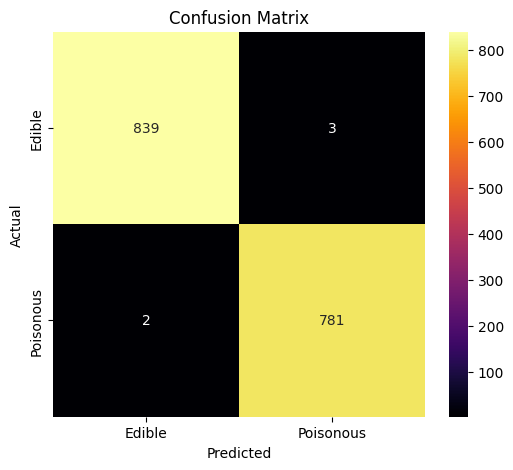

Accuracy: 99.69%


In [ ]:
# Initialize the LogisticRegression model
lr_model = LogisticRegression(random_state=42)

# Train the model on the shuffled data
lr_model.fit(X_train_s, y_train_s)

# Confusion Matrix
y_test_pred = lr_model.predict(X_test_s)
conf_matrix = confusion_matrix(y_test_s, y_test_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="inferno", xticklabels=["Edible", "Poisonous"], yticklabels=["Edible", "Poisonous"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

accuracy=round(100-(5/(839+781+2+3)*100), 2)
print(f"Accuracy: {accuracy}%")